## Exploring CorEx on Recipe Topic Generation

Guide [here](https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb)



In [6]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [7]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small.csv')

In [9]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [10]:
df.head()

,title,ingredients,directions,link,source,NER
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [11]:
# Transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df['ingredients'])
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(22311, 8005)

In [12]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [13]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(22311, 7747)

In [15]:
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [23]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=45)

[('margarine', 0.16599752441704502, 1.0),
 ('stick', 0.09580870238632345, 1.0),
 ('evaporated', 0.003300541261940378, 1.0),
 ('parkay', 0.0006665423563643539, 1.0),
 ('person', 0.0002737100692068668, -1.0),
 ('separate', 0.00018106581395635916, 1.0),
 ('kroger', 0.00014977991252745361, 1.0),
 ('times', 0.0001284640558004576, 1.0),
 ('chewier', 6.368068290979395e-05, 1.0),
 ('goetze', 6.368068290979395e-05, 1.0)]

In [17]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: cup, teaspoon, tsp, cups, tbsp, teaspoons, ounces, oz, pkg, pound
1: flour, baking, purpose, soda, eggs, powder, butter, shortening, egg, yeast
2: vanilla, sugar, chocolate, extract, cinnamon, cocoa, powdered, chips, granulated, confectioners
3: olive, oil, virgin, fresh, extra, cloves, leaves, finely, balsamic, rosemary
4: cheese, cheddar, parmesan, shredded, grated, mozzarella, sharp, cottage, swiss, ricotta
5: juice, lemon, orange, lime, zest, oranges, rind, peel, juiced, mandarin
6: whip, cool, graham, pineapple, cracker, whipped, gelatin, marshmallows, jello, topping
7: cut, inch, pieces, peeled, strips, lengthwise, cubes, halved, bite, removed
8: sauce, soy, worcestershire, boneless, skinless, tomato, pork, tabasco, steak, hot
9: green, chopped, onions, tomatoes, diced, bell, medium, peppers, drained, carrots
10: cream, sour, heavy, soup, mushroom, whipping, softened, tartar, undiluted, dairy
11: chicken, broth, cooked, breasts, celery, dressing, rice, salad, stalks, boiled
12

In [18]:
topic_model.tc

8.875456925857591

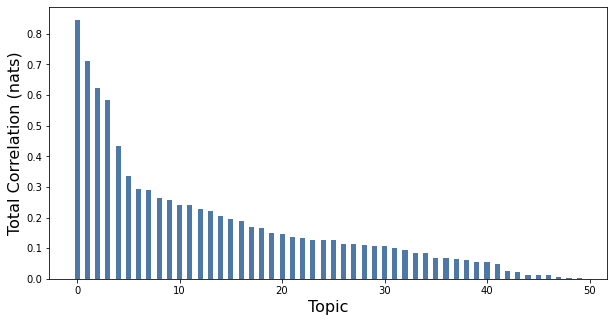

In [51]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [24]:
topic_model10 = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model10.fit(doc_word, words=words);

In [25]:
# Print all topics from the CorEx topic model
topics10 = topic_model10.get_topics()
for n,topic in enumerate(topics10):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: sugar, onion, vanilla, chicken, baking, flour, soda, green, chocolate, cheese
1: cup, tablespoons, teaspoon, tsp, cups, tbsp, tablespoon, teaspoons, ounces, oz
2: pepper, garlic, minced, black, ground, cloves, salt, tomatoes, sauce, chopped
3: olive, oil, fresh, virgin, freshly, extra, kosher, dried, cilantro, thyme
4: cut, leaves, bay, wine, leaf, inch, soy, pieces, sesame, stock
5: red, vinegar, butter, milk, beans, eggs, chili, mustard, peppers, melted
6: whip, pie, cool, pudding, graham, mix, whipped, cream, crust, cracker
7: purpose, room, temperature, packed, unsalted, brown, oats, granulated, firmly, yeast
8: juice, lemon, orange, lime, fat, low, zest, sodium, yogurt, reduced
9: thinly, sliced, peeled, large, spray, quartered, squash, vegetable, yellow, cored


In [26]:
topic_model10.tc

7.993253174446666

#### Notes:

Trying hierarchical

In [52]:
topic_model3 = ct.Corex(n_hidden=10, words=words)
topic_model3.fit(doc_word, words=words, anchors=[['sugar','sugar','soda','flour','powder','vanilla','purpose',\
                                                  'chocolate'],'tofu',\
                                                 ['chicken','beef','pork'],['seafood','shrimp','crab','cod',\
                                                                            'salmon','fillet','tuna']],\
                 anchor_strength=4);

In [53]:
topic_model3.tc

12.158880086743178

In [54]:
# Print all topics from the CorEx topic model
topics3 = topic_model3.get_topics()
for n,topic in enumerate(topics3):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: vanilla, flour, sugar, purpose, soda, chocolate, baking, powder, extract, eggs
1: olive, oil, fresh, red, cloves, virgin, freshly, leaves, extra, wine
2: chicken, beef, pork, broth, boneless, breasts, skinless, breast, stock, bouillon
3: shrimp, salmon, tuna, crab, fillet, cod, deveined, seafood, fillets, fish
4: juice, lemon, orange, lime, zest, room, temperature, oranges, rind, peel
5: pepper, garlic, black, minced, salt, ground, parsley, taste, clove, sliced
6: pkg, oz, cream, soup, mix, whip, mushroom, cool, pudding, graham
7: onion, cheese, green, tomatoes, chopped, sauce, cheddar, lb, tomato, shredded
8: cup, tablespoons, teaspoon, tsp, cups, tablespoon, tbsp, teaspoons, ounces, ounce
9: mustard, vinegar, cider, dijon, spray, cooking, seed, dry, apple, ketchup
